In [3]:
%matplotlib inline

In [19]:
import numpy as np
import skfda

## Infinite (Schauder) basis

Some functional topological vector spaces admit a Schauder basis. This is
a sequence of functions $\Phi = \{\phi_i\}_{i=1}^{\infty}$ so that
for every function $x$ in the space exists a sequence of scalars
$\{a_i\}_{i=1}^{\infty}$ such that

\begin{align}x(t) = \sum_{i=1}^{\infty} a_i \phi_i(t)\end{align}

where the convergence of this series is with respect to the vector space
topology.

If you know that your functions of interest belong to one of these vector
spaces, it may be interesting to express your functions in a basis.
As computers have limited memory and computation resources, it is not
possible to obtain the infinite basis expansion. Instead, one typically
truncates the expansion to a few basis functions, which are enough to
approximate your observations with a certain degree of accuracy. This
truncation also has the effect of smoothing the data, as less important
variations, such as noise, are eliminated in the process. Moreover, as basis
are truncated, the vector space generated by the truncated set of basis
functions is different to the original space, and also different between
different basis families. Thus, the choice of basis matters, even if
originally they would have generated the same space.

In scikit-fda, functions expressed as a basis expansion can be represented
using the class :class:`~skfda.representation.basis.FDataBasis`. The main
attributes of objects of this class are ``basis``, an object representing a
basis family of functions, and ``coefficients``, a matrix with the scalar
coefficients of the functions in the basis.



As an example, we can create the following function, which is expressed in
a truncated monomial basis (and thus it is a polynomial):

\begin{align}x(t) = 3 + 2x - 4x^2 + x^3\end{align}



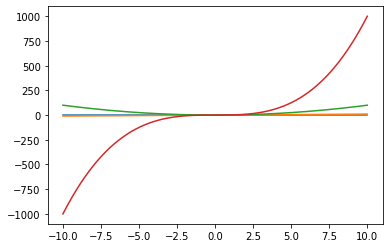

In [22]:
basis = skfda.representation.basis.Monomial(
    n_basis=4,
    domain_range=(-10, 10),
)
basis.plot()

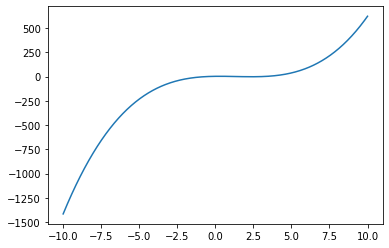

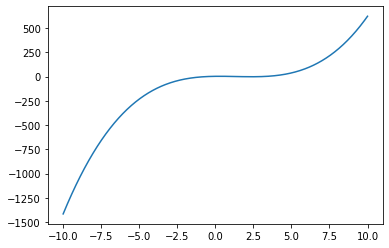

In [23]:
fd_basis = skfda.FDataBasis(
    basis=basis,
    coefficients=[
        [3, 2, -4, 1],  # First (and unique) observation
    ],
)

fd_basis.plot()

First we will load a dataset to test the basis representations.



### Monomial basis

The monomial basis (class :class:`~skfda.representation.basis.Monomial`) is
probably one of the simpler and more well-known basis
of functions. Often Taylor and McLaurin series are explained in the very
first courses of Science and Engineering degrees, and students are familiar
with polynomials since much before. Thus, the monomial basis is useful for
teaching purposes (and that is why we have used it in the examples). It is
also very useful for testing purposes, as it easy to manually derive the
expected results of operations involving this basis.

As a basis for functional data analysis, however, it has several issues that
usually make preferrable to use other basis instead. First, the usual basis
$\{1, x, x^2, x^3, \ldots\}$ is not orthogonal under the standard
inner product in $L^2$, that is $\langle x, y \rangle =
\int_{\mathcal{T}} x(t) y(t) dt$. This inhibits some
performance optimizations that are available for operations that require
inner products. It is possible to find an orthogonal basis of polynomials,
but it will not be as easy to understand, losing many of its advantages.
Another problems with this basis are the necessity of a large
number of basis functions to express local features, the bad behaviour at
the extremes of the function and the fact that the derivatives of the basis
expansion are not good approximations of the derivatives of the original
data, as high order polynomials tend to have very large oscillations.



Here we show the first five elements of the monomial basis.



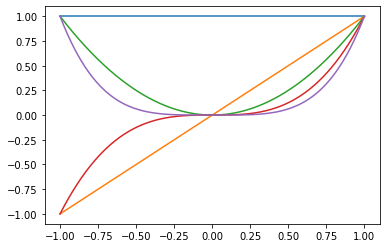

In [26]:
basis = skfda.representation.basis.Monomial(n_basis=5,domain_range=(-1, 1))
basis.plot()

We now show how the previous observations are represented using the first
five elements of this basis.



### Fourier basis

Probably the second most well known series expansion for staticians,
engineers, physicists and mathematicians is the Fourier series. The Fourier
basis (class :class:`~skfda.representation.basis.Fourier`) consist on a
constant term plus sines and cosines of varying frequency,
all of them normalized to unit ($L^2$) norm.
This basis is a good choice for periodic functions (as a function
expressed in this basis has the same value at the beginning and at the end
of its domain interval if it has the same lenght as the period
$\omega$. Moreover, in this case the functions are orthonormal (that
is why the basis used are normalized).

This basis is specially indicated for functions without strong local
features and with almost the same order of curvature everywhere, as
otherwise the expansion require again a large number of basis to represent
those details.



Here we show the first five elements of a Fourier basis.



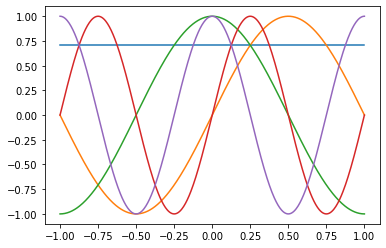

In [30]:
basis = skfda.representation.basis.Fourier(n_basis=4,domain_range=(-1, 1))
basis.plot()

We now show how the previous observations are represented using the first
five elements of this basis.



### B-spline basis

Splines are a family of functions that has taken importance with the advent
of the modern computers, and nowadays are well known for a lot of engineers
and designers. Esentially, they are piecewise polynomials that join smoothly
at the separation points (usually called knots). Thus, both polynomials
and piecewise linear functions are included in this family. Given a set of
knots, a B-spline basis (class :class:`~skfda.representation.basis.BSpline`)
of a given order can be used to express every spline of the same order that
uses the same knots.

This basis is a very powerful basis, as the knots can be adjusted to be able
to express local features, and it is even possible to create points where
the functions are not necessarily  smooth or continuous by placing several
knots together. Also the elements of the basis have the compact support
property, which allows more efficient computations. Thus, this basis is
indicated for non-periodic functions or functions with local features or with
different orders of curvature along their domain.



Here we show the first five elements of a B-spline basis.



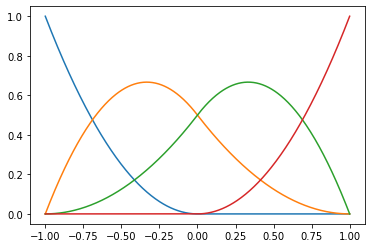

In [48]:
basis = skfda.representation.basis.BSpline(n_basis=4,domain_range=(-1, 1),order=3)
basis.plot()

We now show how the previous observations are represented using the first
five elements of this basis.



In [49]:
basis.inner_product_matrix()

array([[0.2       , 0.11666667, 0.01666667, 0.        ],
       [0.11666667, 0.33333333, 0.2       , 0.01666667],
       [0.01666667, 0.2       , 0.33333333, 0.11666667],
       [0.        , 0.01666667, 0.11666667, 0.2       ]])

In [50]:
basis.gram_matrix()

array([[0.2       , 0.11666667, 0.01666667, 0.        ],
       [0.11666667, 0.33333333, 0.2       , 0.01666667],
       [0.01666667, 0.2       , 0.33333333, 0.11666667],
       [0.        , 0.01666667, 0.11666667, 0.2       ]])